In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
invoice = pd.read_csv(r'C:\Users\renji_tp7vslp\Downloads\fct_invoice (1).csv')
customer = pd.read_json(r"C:\Users\renji_tp7vslp\Downloads\dim_customer (1).json")


In [5]:
# 1 How many unique customers are in the dataset?

unique_customer = customer['id'].nunique()
print(unique_customer)

5191


In [7]:
#2 Easy: What are the different categories of products available? How many unique categories are there?
unique_categories = invoice[ 'category'] .unique ()
count_categories = invoice['category'].nunique ()
print (count_categories)
print(unique_categories)

8
['Clothing' 'Shoes' 'Books' 'Cosmetics' 'Food & Beverage' 'Toys'
 'Technology' 'Souvenir']


In [11]:
#3 Easy: Which payment method is the most popular? How many times was it used?
popular_payment_method = invoice ['payment_method'].value_counts ()
print (popular_payment_method)

payment_method
Cash           44447
Credit Card    34931
Debit Card     20079
Name: count, dtype: int64


In [17]:
#1 Medium: What are the three most popular categories, by total sales?

invoice['sales'] = invoice['price']*invoice['quantity']
category_sales = invoice.groupby ('category' )['sales'].sum().reset_index()
popular_category = category_sales.sort_values('sales', ascending=False)
print(popular_category.head (3))

     category         sales
1    Clothing  1.139968e+08
4       Shoes  6.655345e+07
6  Technology  5.786235e+07


In [27]:
#2 Medium: What are the total sales attributed to customers over the age of 45?

merged_df = pd.merge(invoice, customer, left_on='customer_id', right_on='id')
over_45_sales = merged_df[merged_df['age'] > 45]
over_45_total_sales = over_45_sales['sales'].sum()
print(over_45_total_sales)

82039768.15


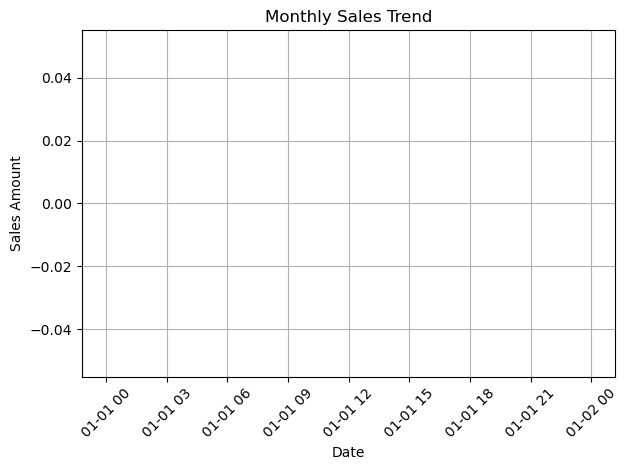

In [53]:
import pandas as pd
import matplotlib.pyplot as plt

]invoice.index = pd.to_datetime(invoice.index, format='%d/%m/%Y', errors='coerce')

# Drop any rows with NaT in the index
invoice = invoice[invoice.index.notna()]

# Resample sales data by month
monthly_sales = invoice['sales'].resample('M').sum()

# Plot the monthly sales trend
plt.figure()
plt.plot(monthly_sales.index, monthly_sales.values, marker='d', color='g', linestyle='-') 
plt.title('Monthly Sales Trend')
plt.xlabel('Date')
plt.ylabel('Sales Amount')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()



In [43]:
#1 Hard: Create a pivot table showing the breakdown of sales across these dimensions, in this order: category, decade age range (e.g., 10-19, 20-29, and so forth).

merged_df['decade_age_range'] = pd.cut(merged_df['age'], bins=[10, 19, 29, 39, 49, 59, 69, 79, 89, 99], labels=['10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90-99'])
pivot_table = pd.pivot_table(merged_df, index='category', columns='decade_age_range', values='sales', aggfunc='sum', fill_value=0)
print("Pivot Table - Sales Breakdown by Category and Decade Age Range:")
print(pivot_table)

Pivot Table - Sales Breakdown by Category and Decade Age Range:
decade_age_range       10-19        20-29        30-39        40-49  \
category                                                              
Books               12801.75     79461.75     84143.10     87203.40   
Clothing          1927413.84  10250732.80  11354126.96  11215189.92   
Cosmetics          109619.36    605915.32    723544.70    665034.96   
Food & Beverage     13582.31     73491.96     87246.86     89553.29   
Shoes              993281.35   5924878.24   7200839.66   7025590.02   
Souvenir            12375.15     54943.32     64092.72     66391.80   
Technology        1129800.00   5261550.00   6159300.00   5954550.00   
Toys                60426.24    385100.80    420582.40    390906.88   

decade_age_range        50-59        60-69       70-79       80-89  90-99  
category                                                                   
Books                74962.20     80476.80    54827.85    26664.00    0.0